LinearRegression은 선형 회귀 분석에서의 간판 대표 모델! 입니다.

x y 이용해서 학생 때 그래프를 그렸듯이
이것도 x y 값에서의 선형 관계를 모델링합니다.

가중치와 절편의 선형 조합으로 계산하는 것이 특징이며 가장 이해하기 쉽고 그래도 성능도 준수한 모델이며 데이터 분석의 기본이라고 봅니다.
다만 안좋은 특징이 학습 데이터와 모델이 잘 안맞으면 모델의 성능이 잘 안나옵니다.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#평균제곱오차
from sklearn.metrics import mean_squared_error

#선형회귀
from sklearn import linear_model

from sklearn import datasets
from sklearn.model_selection import train_test_split 

In [46]:
#먼저 당뇨병 수치가 들어있는 데이터를 불러옵니다
diabetes=datasets.load_diabetes()

In [47]:
#불러온 데이터에서 키가 어떤 것이 있는지를 확인합니다
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [48]:
#키 중 feature_names에는 각 컬럼 이름이 있습니다
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [49]:
#데이터 가공을 위해서는 데이터 프레임 형식으로 만들어서 학습 및 처리에 용이하기에 데이터 프레임 형식으로 만들어줘서 df_x라는 이름으로 둡니다.
#그리고 잘 만들어졌는지 확인을 위해 아래 코드도 추가하였습니다.
#이거는 일단 x에 들어갈 것들 data입니다
df_x = pd.DataFrame(diabetes['data'],columns = diabetes['feature_names'])
df_x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [50]:
#데이터 가공을 위해서는 데이터 프레임 형식으로 만들어서 학습 및 처리에 용이하기에 데이터 프레임 형식으로 만들어줘서 df_y라는 이름으로 둡니다.
#그리고 잘 만들어졌는지 확인을 위해 아래 코드도 추가하였습니다.
#이거는 일단 y... 즉 결과 수치에 들어갈 것들 data입니다
df_y = pd.DataFrame(diabetes['target'])
df_y

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [51]:
#일단 위 원래 데이터프레임 형식으로 제작하여 학습 및 전처리에 사용하나 샘플 데이터는 일단 바로 가져와 적용하였기에 저도 일단 동일하게 하였습니다.
train_x,test_x,train_y,test_y= train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=0)

In [52]:
l_model = linear_model.LinearRegression()

In [53]:
l_model.fit(train_x, train_y)

LinearRegression()

In [54]:
res_pre=l_model.predict(test_x)

In [67]:
res_pre

array([238.46949509, 248.92812015, 164.05732579, 120.30774826,
       187.42483427, 259.04746969, 113.55788482, 188.07762807,
       149.49521726, 236.00758247, 172.24561893, 178.87936198,
       109.16034679,  92.13333574, 243.32766187,  87.35445583,
       155.72165684,  66.98992013, 100.42233598, 218.0957236 ,
       196.6646301 , 161.2972646 , 161.70870434, 156.52404017,
       197.88770177, 167.58280539, 120.7427979 ,  84.84033238,
       192.03438449, 160.60496231, 175.17348034,  84.22759674,
       145.80002729, 145.97264454, 140.96436257, 197.00423168,
       165.94319214, 190.6597389 , 128.22361933, 206.41497077,
        84.3575017 , 164.02262498, 144.10639773, 184.68996616,
       177.80076449,  74.33261184, 143.36644877, 138.68063137,
       120.80857573, 234.34288711, 161.94132344,  74.54325994,
       154.71683591, 156.78815442, 237.41798756, 174.23210042,
       190.87871793, 118.98140389, 132.20521501, 168.52914416,
       214.73950634, 171.42284128, 157.37648738, 108.86

In [56]:
test_y

array([321., 215., 127.,  64., 175., 275., 179., 232., 142.,  99., 252.,
       174., 129.,  74., 264.,  49.,  86.,  75., 101., 155., 170., 276.,
       110., 136.,  68., 128., 103.,  93., 191., 196., 217., 181., 168.,
       200., 219., 281., 151., 257.,  49., 198.,  96., 179.,  95., 198.,
       244.,  89., 214., 182.,  84., 270., 156., 138., 113., 131., 195.,
       171., 122.,  61., 230., 235.,  52., 121., 144., 107., 132., 302.,
        53., 317., 137.,  57.,  98., 170.,  88.,  90.,  67., 163., 104.,
       186., 180., 283., 141., 150.,  47., 297., 104.,  49., 103., 142.,
        59.])

In [57]:
#평균 제곱 오차의 테스트 결과값이 test_y, 그리고 선형회귀 예측 모델을 이용해서 학습을 시켜 예상 결과가 담겨있는 res_pre
#이 두 개를 비교하여 평균 제곱 오차를 한 수치를 나타낸 것 입니다.
mse=mean_squared_error(test_y, res_pre)
rmse=np.sqrt(mse)
rmse

58.517171277315605

In [83]:
#평균 제곱 오차의 합 계산입니다.
n = len(test_y)
res_mse = ((test_y - res_pre) ** 2).sum() / n
res_mse
#3424로서 3500을 넘지 않아 선형 회귀에서 1개 찾았습니다!

3424.2593342986906

In [97]:
print(test_x.shape)

(89, 10)


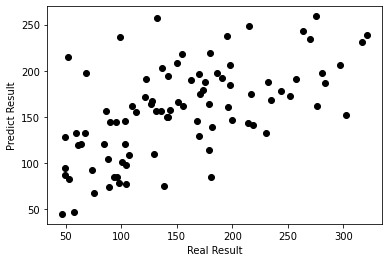

In [106]:
#모델이 예측한 값과 실체 값의 차이를 산점도를 이용하여 나타나였습니다.
plt.scatter(test_y, res_pre, color='black')
plt.xlabel('Real Result')
plt.ylabel('Predict Result')
plt.show()

###여기서부터는 비선형회귀 모델입니다.